# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the Data

In [2]:
# Load the data. The url for the data is:
# https://www.kaggle.com/datasets/dsfelix/us-stores-sales
df = pd.read_csv('data/sales.csv')
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [3]:
# Get more info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

In [4]:
# Get descriptive statistics
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000


## Data Dictionary


   - Area Code: Store's Code;
   - State: Store's State;
   - Market: Store's Region;
   - Market Size: Store's Size;
   - Profit: Profits in Dollars (\\$);
   - Margin: Profit + Total Expenses (\\$) Or Sales - COGS (\\$);
   - Sales: Values Acquired in Sales (\\$);
   - COGS: Cost of Goods Sold (\\$);
   - Total Expenses: Total Expenses to get the Product to Sell (\\$);
   - Marketing: Expenses in Marketing (\\$);
   - Inventory: Inventory Value of the Product in the Sale Moment (\\$);
   - Budget Profit: Expected Profit (\\$);
   - Budget COGS: Expected COGS (\\$);
   - Budget Margin: Expected Profit + Expected Total Expenses (\\$) OR Expected Sales - Expected COGS (\\$);
   - Budget Sales: Expected Value Acquired in Sales (\\$);
   - ProductID: Product ID;
   - Date: Sale Date;
   - Product Type: Product Category;
   - Product: Product Description;
   - Type: Type;


In [5]:
# Get the dimensions of the data frame
df.shape

(4248, 20)

# Data Cleaning

In [6]:
# Check for duplicates
print('There are', df.duplicated().sum(), 'duplicates.')

There are 0 duplicates.


In [7]:
# Check for missing values
print('There are', df.isna().sum().sum(), 'missing values.')

There are 0 missing values.


In [8]:
# Check the labels
cat_cols = df.select_dtypes('object').columns

for col in cat_cols:
    print('The labels for the', col, 'column.')
    print(df[col].value_counts())
    print()

The labels for the State column.
Utah             288
California       288
Colorado         264
Oregon           264
Nevada           264
Washington       240
Ohio             216
Illinois         216
Florida          216
Wisconsin        216
Missouri         216
Iowa             216
New York         192
Louisiana        168
Oklahoma         168
Texas            168
New Mexico       168
New Hampshire    168
Connecticut      168
Massachusetts    144
Name: State, dtype: int64

The labels for the Market column.
West       1344
Central    1344
East        888
South       672
Name: Market, dtype: int64

The labels for the Market Size column.
Small Market    2544
Major Market    1704
Name: Market Size, dtype: int64

The labels for the Date column.
04/01/10 00:00:00    177
07/01/10 00:00:00    177
06/01/11 00:00:00    177
09/01/10 00:00:00    177
03/01/10 00:00:00    177
08/01/10 00:00:00    177
05/01/10 00:00:00    177
02/01/10 00:00:00    177
12/01/11 00:00:00    177
05/01/11 00:00:00    17

# Split the Data

In [9]:
# Train, test, split
X = df.drop(columns = 'Profit')
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Data Visualizations

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

/tmp/ipykernel_154330/2935377663.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(avg_profit.index, rotation = 90);
/tmp/ipykernel_154330/2935377663.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(avg_profit.index, rotation = 90);
/tmp/ipykernel_154330/2935377663.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(avg_profit.index, rotation = 90);
/tmp/ipykernel_154330/2935377663.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(avg_profit.index, rotation = 90);
/tmp/ipykernel_154330/2935377663.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[idx].set_xticklabels(avg_profit.index, rotation = 90);
/tmp/ipykernel_154330/2935377663.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator


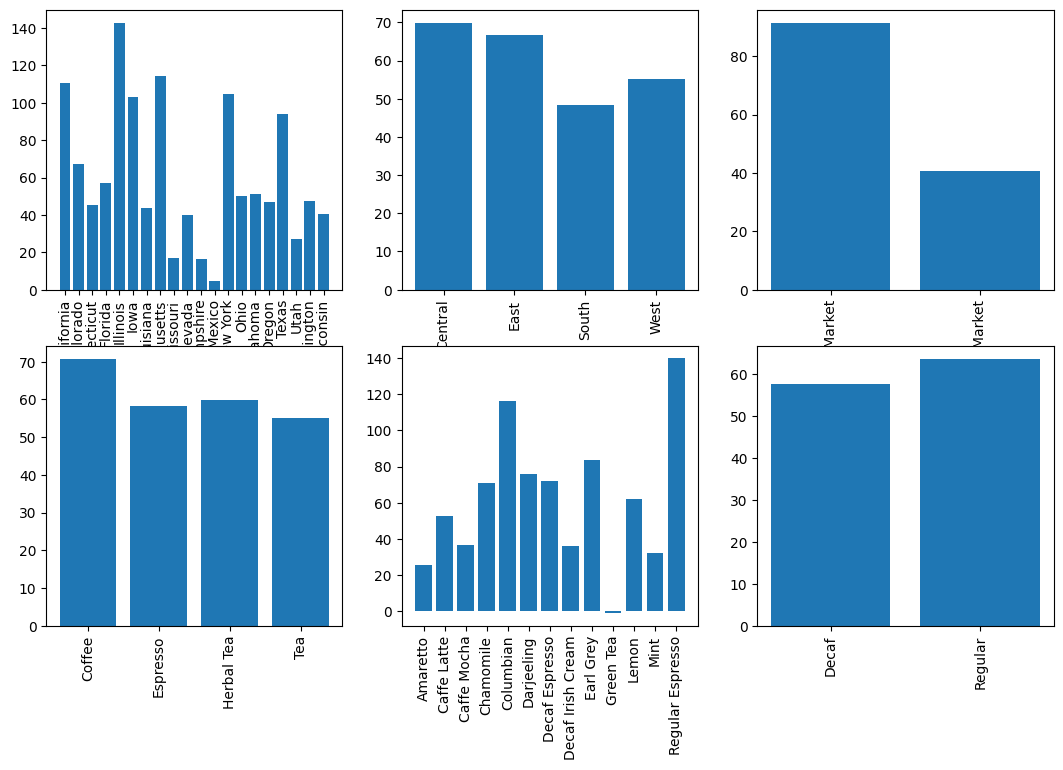

In [11]:
# Construct quick and dirty barplots of profit vs. the categorical columns.
cols = df.select_dtypes(include = 'object').drop(columns = 'Date').columns

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 8));
axes = axes.flatten()

for idx, col in enumerate(cols):
    avg_profit = df.groupby(col)['Profit'].mean()
    axes[idx].bar(avg_profit.index, avg_profit.values);
    axes[idx].set_xticklabels(avg_profit.index, rotation = 90);

> We're not worried about the formatting with these bar graphs. We will make prettier bar graphs of the graphs from above that stand out.

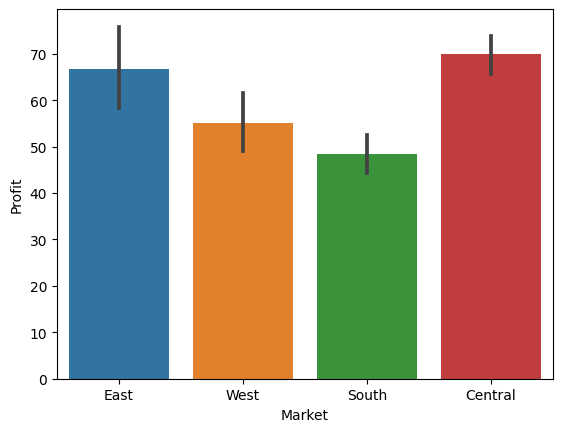

In [12]:
# Barplot of Profit vs. Market
sns.barplot(data = df, x = 'Market', y = 'Profit');

In [13]:
# Determine which states are in each market.
df.groupby('Market')['State'].value_counts()

Market   State        
Central  Colorado         264
         Illinois         216
         Iowa             216
         Missouri         216
         Ohio             216
         Wisconsin        216
East     Florida          216
         New York         192
         Connecticut      168
         New Hampshire    168
         Massachusetts    144
South    Louisiana        168
         New Mexico       168
         Oklahoma         168
         Texas            168
West     California       288
         Utah             288
         Nevada           264
         Oregon           264
         Washington       240
Name: State, dtype: int64

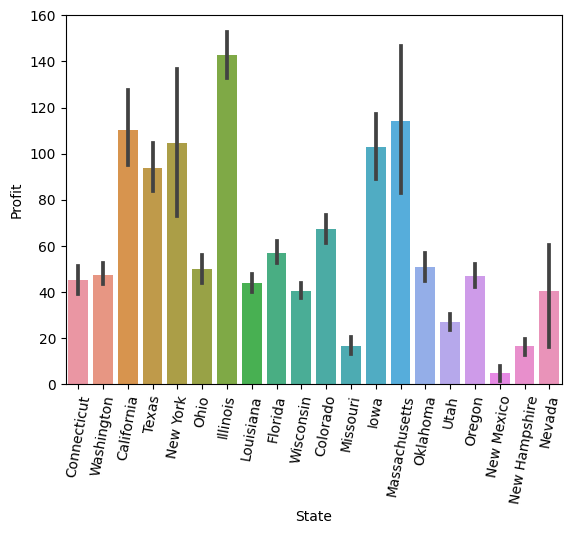

In [14]:
# Barplot of Profic vs. State
sns.barplot(data = df, x = 'State', y = 'Profit');
plt.xticks(rotation = 80);

- New Mexico, Missouri, and New Hampshire are among the states with the lowest profits.
- Illinois, California, and Massachusetts are among the states with the highest profits

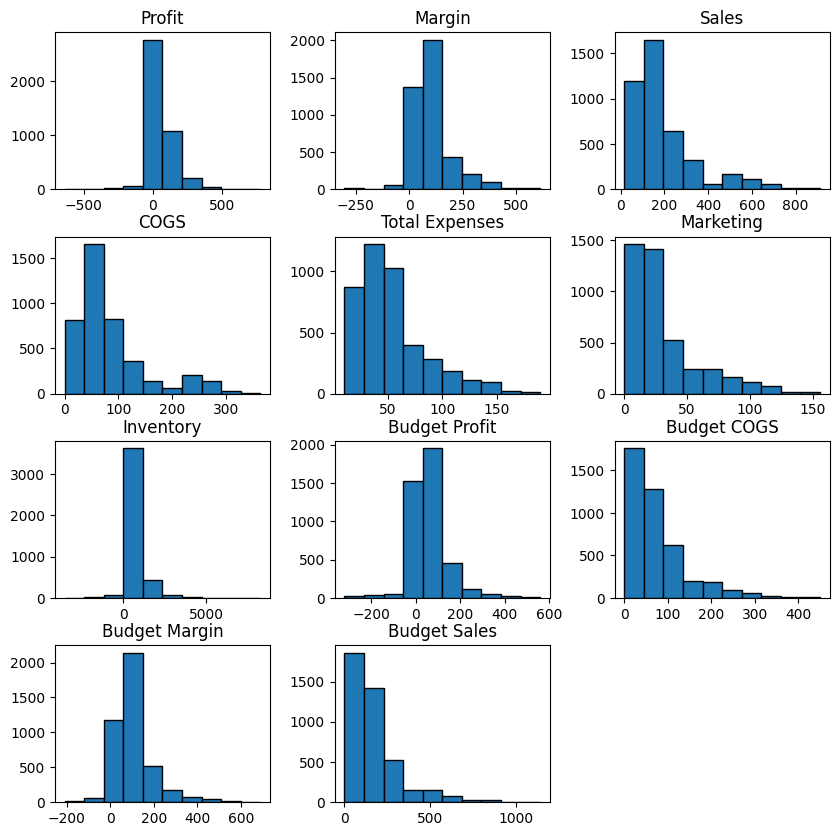

In [15]:
# Construct histograms
df.drop(columns = ['Area Code', 'ProductId']).hist(figsize = (10, 10), grid = False, edgecolor = 'k');

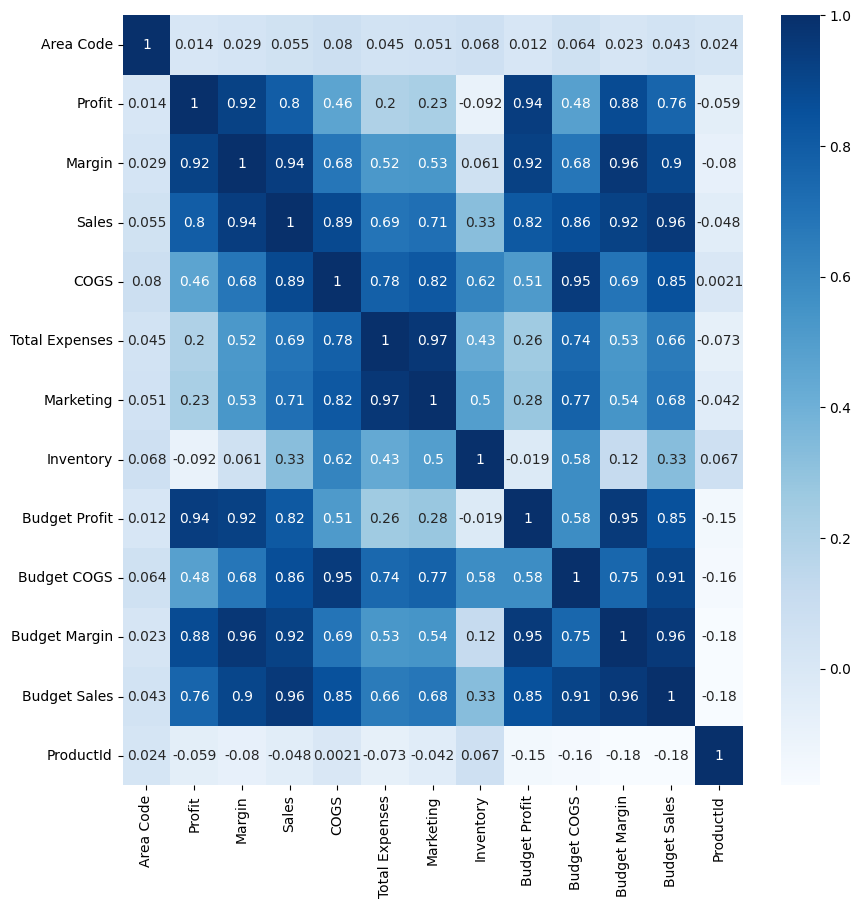

In [16]:
# Make a heatmap of correlations
corr = df.corr()
plt.figure(figsize = (10, 10));
sns.heatmap(corr, annot = True, cmap = 'Blues');

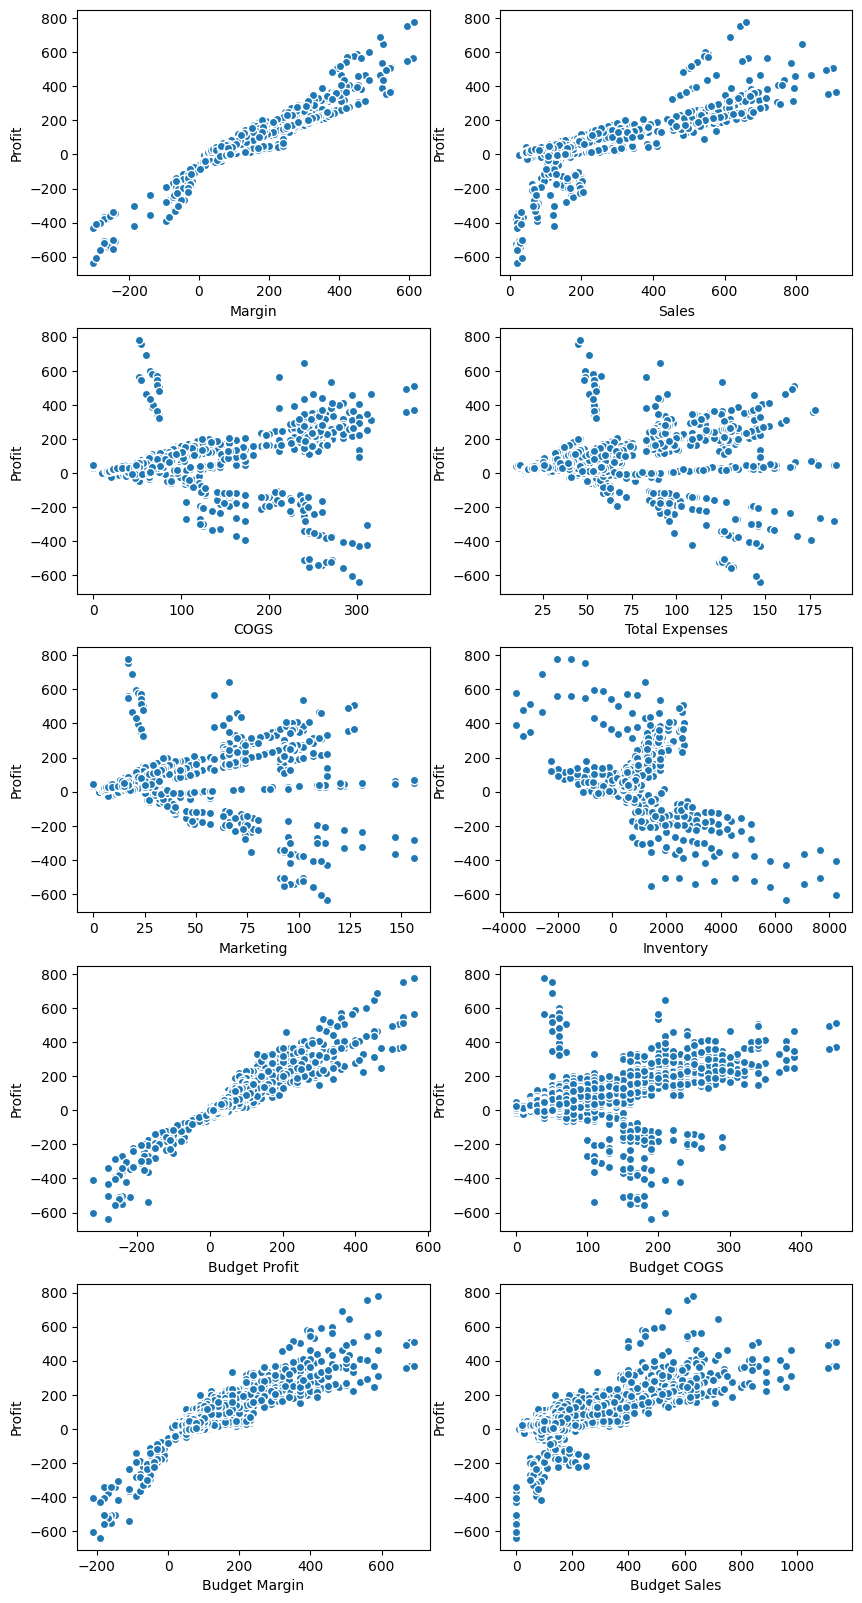

In [17]:
# Scatterplots with profit on the vertical axis
cols = df.select_dtypes(include = 'number').drop(columns = ['Profit',
                                                            'Area Code',
                                                            'ProductId'])
cols = cols.columns

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 20));
axes = axes.flatten()

for idx, col in enumerate(cols):
    axes[idx].scatter(y = df['Profit'], x = df[col], edgecolor = 'w')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Profit')

# Linear Regression

In [18]:
# Select features for linear regression using inspection of the scatter plots
features = ['Margin',
            'Sales',
            'COGS',
            'Budget Profit',
            'Budget Margin']

In [19]:
# Construct a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train[features], y_train)

LinearRegression()

In [20]:
# Make predictions and evaluate the model
train_preds = lin_reg.predict(X_train[features])
test_preds = lin_reg.predict(X_test[features])

train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print('Train MSE:', train_mse)
print('Train MAE:', train_mae)
print('Train RMSE:', np.sqrt(train_mse))
print('Train R2:', train_r2)
print()
print('Test MSE:', test_mse)
print('Test MAE:', test_mae)
print('Test RMSE:', np.sqrt(test_mse))
print('Test R2:', test_r2)

Train MSE: 411.2259570222997
Train MAE: 13.41960060349114
Train RMSE: 20.278706985956962
Train R2: 0.9593177786489071

Test MSE: 450.54674976725937
Test MAE: 13.349048934151043
Test RMSE: 21.22608653914469
Test R2: 0.9591747128129435
